# Calculus and Algebra problems

## Calculus

Calculus is not obscure. It is the language for modeling behaviors. Calculus enables us to find the rate of changes in order to optimize a function. Without calculus, we would not be able to fully understand techniques such as:

Backpropagation in neural networks

Regression using optimal least square

Expectation maximization in fitting probability models

### Exercise 1

Let's say, in my office, it takes me 10 seconds (time) to travel 25 meters (distance) to the coffee machine.
If we want to express the above situation as a function, then it would be:

distance = speed * time

So for this case, speed is the first derivative of the distance function above. As speed describes the rate of change of distance over time, when people say taking the first derivative of a certain function, they mean finding out the rate of change of a function.

**Find the speed and build the linear function on distance $(d)$ over time $(t)$, when $(t ∈ [0,10])$.**

In [93]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

speed = 25/10

# Define the distance function
def distance(speed, t):
    d = speed*t
    return d

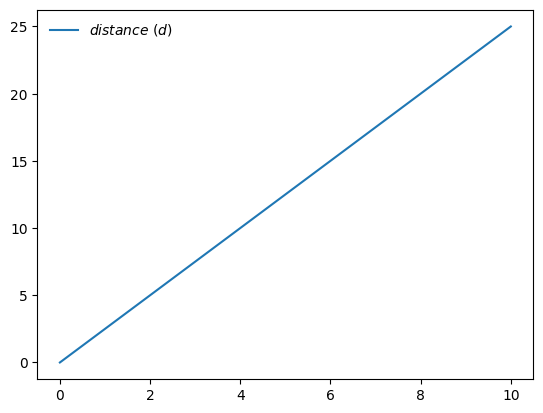

In [94]:
# Plot the distance function on domain (t)
t_array = np.linspace(0,10,11)

plt.plot(t_array,
         distance(speed, t_array),
         label = '$distance\ (d)$')
plt.legend(loc= 'best',
           frameon=False)
plt.show()

In [95]:
# Create a DataFrame
d_array = []
for t in t_array:
    d_array.append(distance(speed, t))

data_dict = {'time (s)':t_array,
             'distance (m)': d_array}

d_df = pd.DataFrame(data_dict)
d_df

,time (s),distance (m)
0,0.0,0.0
1,1.0,2.5
2,2.0,5.0
3,3.0,7.5
4,4.0,10.0
5,5.0,12.5
6,6.0,15.0
7,7.0,17.5
8,8.0,20.0
9,9.0,22.5


### Exercise 2

It turned out that I wasn't walking a constant speed towards getting my coffee, but I was accelerating (my speed increased over time). If my initial *speed = 0*, it still took me 10 seconds to travel from my seat to my coffee, but I was walking faster and faster.

$V_o$ = initial speed = $0$

t = time

a = acceleration

**distance** = $V_o * t + 0.5 * a * (t^2)$

**speed** = $V_o + a * t$

The first derivative of the speed function is acceleration. I realize that the speed function is closely related to the distance function.

**Find the acceleration value and build the quadratic function  $(t ∈ [0,10])$. Also, create a graph and a table.**

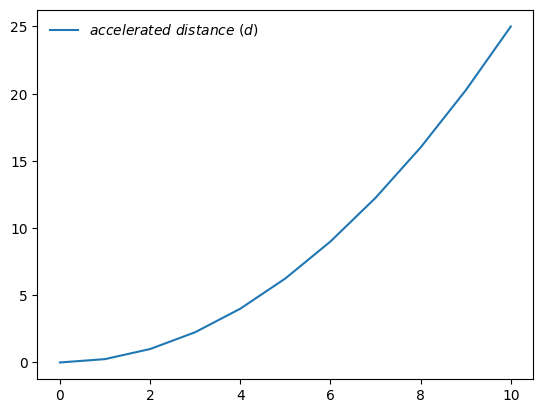

In [96]:
# Define and plot the quadratic funtion

d = 25
Vo = 0
final_t = 10
a = (d - Vo*final_t)/(0.5 * final_t**2)

def distance_2(Vo, t, a):
    d = Vo*t + 0.5 * a * (t**2)
    return d

plt.plot(t_array,
         distance_2(Vo, t_array, a),
         label ='$accelerated\ distance\ (d)$')
plt.legend(loc='best',
           frameon=False)
plt.show()

In [97]:
# Create a DataFrame
speed_array = []
for t in t_array:
    Vi = Vo + a*t
    speed_array.append(Vi)
    Vo = Vi

accelerated_d_array = []
for t in t_array:
    Vo = 0
    d = Vo*t + (0.5 * a * t**2)
    accelerated_d_array.append(d)

accelerated_data_dict = {'time (s)':t_array, 'speed (m/s)': speed_array, 'd (m)':accelerated_d_array}
accelerated_df = pd.DataFrame(accelerated_data_dict)
accelerated_df

,time (s),speed (m/s),d (m)
0,0.0,0.0,0.00
1,1.0,0.5,0.25
2,2.0,1.5,1.00
3,3.0,3.0,2.25
4,4.0,5.0,4.00
5,5.0,7.5,6.25
6,6.0,10.5,9.00
7,7.0,14.0,12.25
8,8.0,18.0,16.00
9,9.0,22.5,20.25


Before exercise 3, we'll make a brief introduction to Gradient Descent algorithm, which will have a larger explanation in future modules of the bootcamp.

Gradient Descent algorithm is the hero behind the family of deep learning algorithms. When an algorithm in this family runs, it tries to minimize the error between the training input and predicted output. This minimization is done by optimization algorithms, and gradient descent is the most popular one.

Let's say you have these input & output pairs:

```py
# Input:
[
 [1,2],
 [3,4]
]

# Output:
[
 [50],
 [110]
]
```

We can estimate that if we multiply the input values by [10, 20], we can have the output as shown above.

```py
1(10) + 2(20) = 50

3(10) + 4(20) = 110
```

When a machine learning algorithm starts running, it assigns random values and makes a prediction. 
Let's say it assigned [1,2] values:

```py
1(1) + 2(2) = 5

3(1) + 4(2) = 11
```

Once it has the predictions, it calculates the error: the difference between the real data and the predicted data. There are many ways to calculate the error, and they are called loss functions.

Once we have this value, the optimization algorithm starts showing itself, and it sets new values which replace the initial random values. 

And, the loop continues until a condition is met. That condition can be to loop *n* times, or to loop until the error is smaller than a value.

It can be hard to understand **gradient descent** without understanding **gradient**. So, let's focus on what a gradient is. The gradient shows the direction of the greatest change of a scalar function. The gradient calculation is done with derivatives, so let's start with a simple example. To calculate the gradient, we just need to remember some linear algebra calculations from high school because we need to calculate derivatives.

Let's say we want to find the minimum point of $f(x) = x^2$. The derivative of that function is $df(x)=2x$. 

The gradient of $f(x)$ at point $x=-10$

is 

$df(-10)=-20$.

The gradient of $f(x)$ at point $x=1$

is 

$df(1)=2$.

Now let’s visualize $f(x)$ and those $x=-10$ and $x=1$ points.

In [98]:
import numpy as np
import seaborn as sns

def f(x):
    return x**2

def df(x):
    return 2*x

def visualize(f, x=None):
    
    xArray = np.linspace(-10, 10, 100) 
    yArray = f(xArray)
    sns.lineplot(x=xArray, y=yArray)
    
    if x is not None:
        assert type(x) in [np.ndarray, list] # x should be numpy array or list
        if type(x) is list: # if it is a list, convert to numpy array
            x = np.array(x)

            
        y = f(x)
        sns.scatterplot(x=x, y=y, color='red')

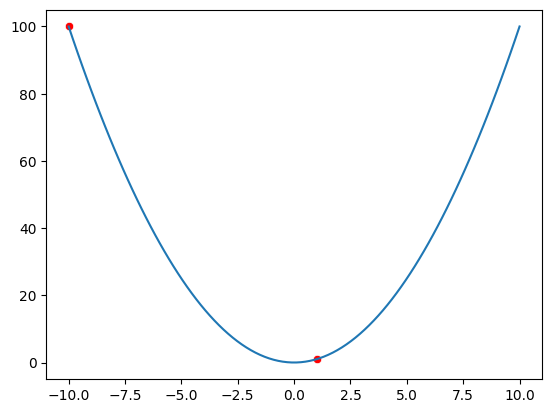

In [99]:
visualize(f, x=[-10, 1])

The red dot at x=-10 does not know the surface it stands on, and it only knows the coordinates of where it stands and the gradient of itself, which is -20. And the other red dot at x=1 does not know the surface it stands on; it only knows the coordinates of where it stands and the gradient of itself, which is 2.

By having only this information: we can say that the red dot at x=-10 should make a bigger jump than x=1 because it has a bigger absolute gradient value. The sign shows the direction. Minus (-) shows that the red dot at x=-10 should move to the right and the other one should move to the left.

In summary, the red dot at x=-10 (gradient: -20) should make a bigger jump to the right, and the red dot at x=1 (gradient: 2) should make a smaller jump to the left. 

We know that the jump length should be proportional to the gradient, but what is that value exactly? We don’t know. So, let’s just say that red points should move with the length of *alpha * gradient*, where alpha is just a parameter.

We can say that the new location of the red dot should be calculated with the following formula:

x = x - gradient * alpha

Now let's implement this with **NumPy**. Let's start with visualizing the $f(x)=x^2$ function and the $x=-10$ point.

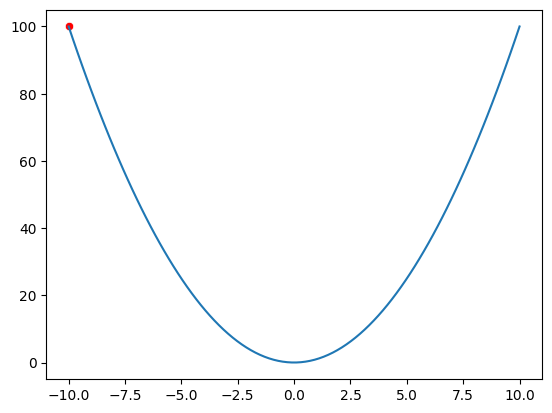

In [100]:
visualize(f, x=[-10])

The following code implements the whole logic explained before:

In [101]:
def gradient_descent(x, nsteps=1):
    
    
    # collectXs is an array to store how x changed in each iteration, so we can visualize it later
    
    collectXs = [x]
    
    # learning_rate is the value that we mentioned as alpha in the previous section
    
    learning_rate = 1e-01
    
    for _ in range(nsteps):
        
        # The following one line does the real magic
        # The next value of x is calculated by subtracting the gradient * learning_rate by itself
        # The intuition behind this line is in the previous section
        
        x -= df(x) * learning_rate 
        collectXs.append(x)
        
    # We return a tuple that contains
    # x -> recent x after nsteps 
    # collectXs -> all the x values that were calculated so far
    
    return x, collectXs

Before running a gradient descent with 1000 steps, let's just run it twice, one step at a time, to see how x evolves. 
We start with x=-10, and it evolves to x=-8. We know that when x=0 that is the **minimum point**, so yes, it is evolving in the correct direction.

In [102]:
x=-10
x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-8.0


In [103]:
# The next step will start at x=-8. Let's run a gradient for 1 step

x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-6.4


It goes to x=-6.4. Excellent. Now let's run it 1000 times

In [104]:
x, collectedXs = gradient_descent(x, nsteps=1000)
print(x)
print(collectedXs)

-7.873484301831169e-97
[-6.4, -5.12, -4.096, -3.2768, -2.62144, -2.0971520000000003, -1.6777216000000004, -1.3421772800000003, -1.0737418240000003, -0.8589934592000003, -0.6871947673600002, -0.5497558138880001, -0.43980465111040007, -0.35184372088832006, -0.281474976710656, -0.22517998136852482, -0.18014398509481985, -0.14411518807585588, -0.11529215046068471, -0.09223372036854777, -0.07378697629483821, -0.05902958103587057, -0.04722366482869646, -0.037778931862957166, -0.030223145490365734, -0.024178516392292588, -0.01934281311383407, -0.015474250491067256, -0.012379400392853806, -0.009903520314283045, -0.007922816251426436, -0.006338253001141149, -0.00507060240091292, -0.0040564819207303355, -0.0032451855365842686, -0.002596148429267415, -0.002076918743413932, -0.0016615349947311456, -0.0013292279957849164, -0.001063382396627933, -0.0008507059173023465, -0.0006805647338418772, -0.0005444517870735017, -0.0004355614296588014, -0.0003484491437270411, -0.00027875931498163285, -0.00022300

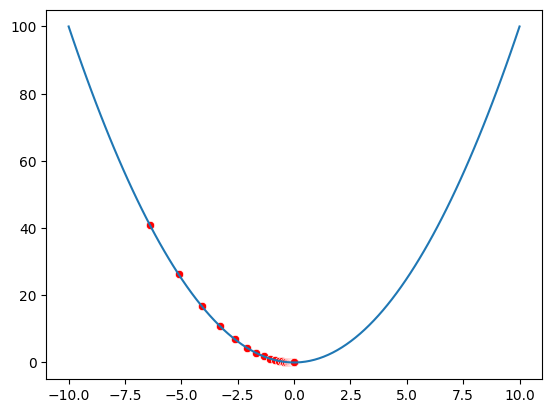

In [105]:
visualize(f, x=collectedXs)

### Exercise 3

When I arrive to the coffee machine, I hear my colleague talking about the per-unit costs of producing 'product B' for the company. As the company produces more units, the per-unit costs continue to decrease until a point where they start to increase.

To optimize the per-unit production cost at its minimum to optimize efficiency, the company would need to find the number of units to be produced where the per-unit production costs begin to change from decreasing to increasing.

**Build a quadratic function $f(x)=0.1(x)^2−9x +4500$ on $x∈[0,100]$ to create the per-unit cost function, and make a conclusion.**

<Axes: >

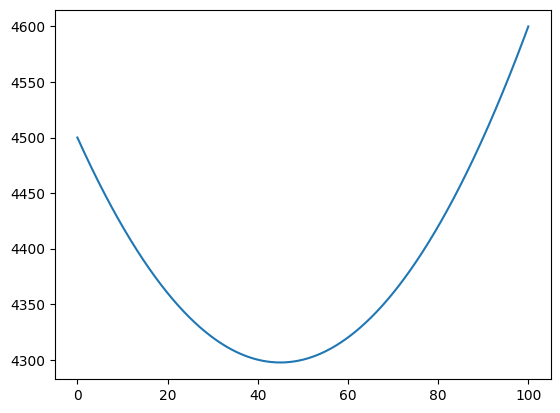

In [106]:
# Define and plot the function
x_array = np.linspace(0,100,1000)

def f(x):
    y = (0.1 * x**2) - (9 * x) + 4500
    return y

sns.lineplot(x=x_array, y=f(x_array))

We saw with Gradient Descent how the red dot navigates in an environment it does not know about. It only knows the coordinates of where it is and its gradient. The red dot could find the minimum point by using only this knowledge and the gradient descent algorithm.

**Optional:**

Implement all the previous steps to create a gradient descent algorithm to see how the per-unit cost evolves, with a starting point of 0 units of production.

In [107]:
# define derivative function
def df(x):
    dy = 0.2*x - 9
    return dy

In [135]:
# define gradient descent function
def gradient_descent(x, nsteps):
    collected_Xs = [x]
    learning_rate = 0.5
    for _ in range(nsteps):
        x -= df(x) * learning_rate 
        collected_Xs.append(x)    
    return x, collected_Xs

In [139]:
# determine final value of x and collected Xs
x, collected_Xs = gradient_descent(0, 100)
x, collected_Xs

(44.99880473705005,
 [0,
  4.5,
  8.55,
  12.195,
  15.4755,
  18.42795,
  21.085155,
  23.4766395,
  25.62897555,
  27.566077995,
  29.3094701955,
  30.87852317595,
  32.290670858355,
  33.5616037725195,
  34.70544339526755,
  35.7348990557408,
  36.66140915016672,
  37.49526823515005,
  38.245741411635045,
  38.92116727047154,
  39.52905054342439,
  40.07614548908195,
  40.56853094017376,
  41.01167784615638,
  41.41051006154074,
  41.76945905538667,
  42.092513149848,
  42.383261834863205,
  42.64493565137688,
  42.88044208623919,
  43.09239787761527,
  43.28315808985374,
  43.45484228086837,
  43.60935805278153,
  43.74842224750338,
  43.87358002275304,
  43.98622202047773,
  44.08759981842996,
  44.17883983658696,
  44.26095585292826,
  44.334860267635435,
  44.40137424087189,
  44.4612368167847,
  44.515113135106226,
  44.563601821595604,
  44.60724163943604,
  44.64651747549244,
  44.68186572794319,
  44.713679155148874,
  44.742311239633985,
  44.768080115670585,
  44.791272104

<Axes: >

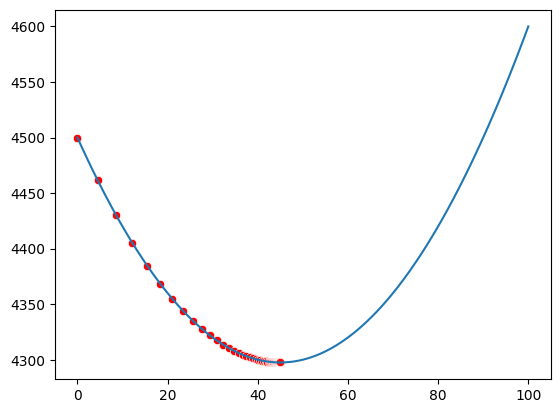

In [144]:
#plot function curve and collected Xs value after applying gradient descent function
sns.lineplot(x=x_array, y=f(x_array))
y = f(np.array(collected_Xs))
sns.scatterplot(x=collected_Xs, y=y, color='red')

## Linear Algebra

### Exercise 1: Sum of two matrices

Suppose we have two matrices A and B.

```py
A = [[1,2],[3,4]]
B = [[4,5],[6,7]]

then we get
A+B = [[5,7],[9,11]]
A-B = [[-3,-3],[-3,-3]]
```

Make the sum of two matrices using Python with NumPy

In [148]:
# import numpy as np
import numpy as np
 
 
# Creating first matrix
A = np.array([[1,2],[3,4]])
 
# Creating second matrix
B = np.array([[4,5],[6,7]])
 
# Print elements
print(A,B)
 
# Adding both matrices
print(A+B)

[[1 2]
 [3 4]] [[4 5]
 [6 7]]
[[ 5  7]
 [ 9 11]]


### Exercise 2: Sum of two lists

There will be many situations in which we'll have to find an index-wise summation of two different lists. This can have possible applications in day-to-day programming. In this exercise, we will solve the same problem in various ways in which this task can be performed.

We have the following two lists:

```py
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
```

Now let's use Python code to demonstrate addition of two lists.

In [5]:
# Naive method

# Initializing lists
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
 
# Printing original lists
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# Using naive method to add two lists 
res_list = []
for i in range(0, len(list1)):
    res_list.append(list1[i] + list2[i])
 
# Printing resulting list 
print ("Resulting list is : " + str(res_list))

Original list 1 : [2, 5, 4, 7, 3]
Original list 2 : [1, 4, 6, 9, 10]
Resulting list is : [3, 9, 10, 16, 13]


Now use the following three different methods to make the same calculation: sum of two lists

In [20]:
# Use list comprehension to perform addition of the two lists:

# Initializing lists
list_1 = [2, 4, 6, 8, 10]
list_2 = [1, 3, 5, 7, 9]
 
# Printing original lists
print(list_1, list_2)
 
# Using list comprehension to add two lists
lc_sum = [list_1[i]+ list_2[i] for i in range(len(list_1))]
 
# Printing resulting list 
print(lc_sum)

[2, 4, 6, 8, 10] [1, 3, 5, 7, 9]
[3, 7, 11, 15, 19]


In [21]:
# Use map() + add():


# Initializing lists
list_3 = [0.1, 0.2, 0.3, 0.4]
list_4 = [0.9, 0.8, 0.7, 0.6]
 
# Printing original lists
print(list_3, list_4)
 
# Using map() + add() to add two lists
def add(a, b):
    c = a + b
    return c
 
# Printing resulting list 
map_sum = list(map(add, list_3, list_4))
print(map_sum)

[0.1, 0.2, 0.3, 0.4] [0.9, 0.8, 0.7, 0.6]
[1.0, 1.0, 1.0, 1.0]


In [37]:
# Use zip() + sum():

# Initializing lists
list_5 = [10, 20, 30, 40, 50]
list_6 = [100, 200, 300, 400, 500]
 
# Printing original lists
print(list_5, list_6)
 
# Using zip() + sum() to add two lists
zipped = list(map(sum, zip(list_5, list_6)))
 
# Printing resulting list 
print(zipped)

[10, 20, 30, 40, 50] [100, 200, 300, 400, 500]
[110, 220, 330, 440, 550]


### Exercise 3: Dot multiplication

We have two matrices:

```py
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
```

A simple technique but expensive method for larger input datasets is using *for loops*. In this exercise, we will first use nested *for loops* to iterate through each row and column of the matrices, and then we will perform the same multiplication using NumPy.

In [66]:
# Using a for loop input two matrices of size n x m
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
 
res = [[0 for x in range(3)] for y in range(3)]
 
# Explicit for loops
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
 
            # Resulting matrix
            res[i][j] += matrix1[i][k] * matrix2[k][j]
 
print(res)

[[24, 33, 28], [33, 36, 23], [25, 29, 23]]


In [2]:
# Import libraries
import numpy as np
 
# Input two matrices
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
 
# This will return dot product
dot_product = np.dot(matrix1, matrix2)
 
# Print resulting matrix
print(dot_product)


[[24 33 28]
 [33 36 23]
 [25 29 23]]


Source:

https://www.youtube.com/channel/UCXq-PLvYAX-EufF5RAPihVg

https://www.geeksforgeeks.org/

https://medium.com/@seehleung/basic-calculus-explained-for-machine-learning-c7f642e7ced3

https://blog.demir.io/understanding-gradient-descent-266fc3dcf02f